In [1]:
from osgeo import gdal
import numpy as np
import matplotlib.pyplot as plt

In [3]:
# 打开DEM栅格数据
dataset = gdal.Open("E:/gis/毕业论文/arcgis工程/data/高程/掩膜DEM.tif")
# 读取栅格数据的第一个波段
band = dataset.GetRasterBand(1)

32767.0


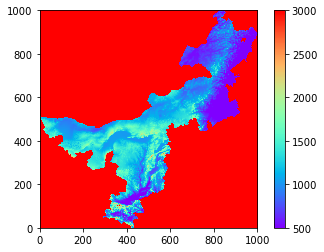

In [6]:
data = band.ReadAsArray()

32767.0


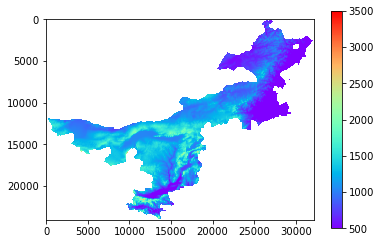

In [10]:
# 读取无效值
nodata = band.GetNoDataValue()
print(nodata)
# 把无效值替换为0再变成nan
data[data == nodata] = 0
data = np.where(data == 0, np.nan, data)

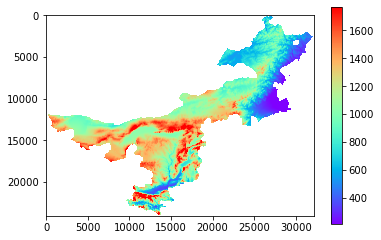

In [13]:
# 直方图分布2%值和98%值
vmax = np.nanpercentile(data, 98)
vmin = np.nanpercentile(data, 2)


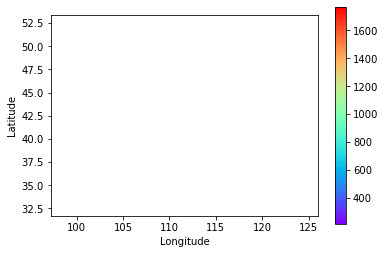

In [17]:
# 获取经纬度范围
geotransform = dataset.GetGeoTransform()

# matplotlib横轴为经度，纵轴为纬度
# 读取左上角经纬度
lon = geotransform[0]
lat = geotransform[3]

# 读取栅格数据的列数和行数
cols = dataset.RasterXSize
rows = dataset.RasterYSize

# 读取栅格数据的分辨率
xres = geotransform[1]
yres = geotransform[5]

# 生成经纬度范围
lon = np.arange(lon, lon + xres * cols, xres)
lat = np.arange(lat, lat + yres * rows, yres)

# 生成网格
lon, lat = np.meshgrid(lon, lat)

# 出图
plt.imshow(data, cmap='terrain', vmin=vmin, vmax=vmax, extent=[lon.min(), lon.max(), lat.min(), lat.max()])
plt.colorbar()
plt.show()

MemoryError: Unable to allocate 5.77 GiB for an array with shape (24077, 32167) and data type float64

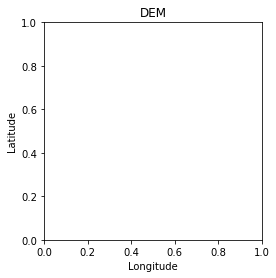

In [21]:
# 横轴为经度，纵轴为纬度
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('DEM')
plt.imshow(data, cmap='rainbow', vmin=vmin, vmax=vmax)
plt.colorbar()
plt.show()

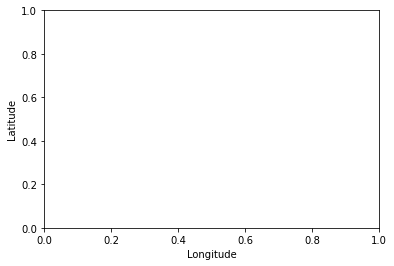

In [19]:
map = Basemap(projection='merc', llcrnrlat=lat.min(), urcrnrlat=lat.max(), llcrnrlon=lon.min(), urcrnrlon=lon.max(), resolution='i')

In [1]:
import ee
import geemap

In [2]:
ee.Authenticate()
ee.Initialize()

Enter verification code: 4/1AVHEtk4xYT9ATZ0Bff7uFson2pPTE9SxZ4Ugu9NRGSTlgIPXS_bSc1x1ZUU

Successfully saved authorization token.


In [4]:
Map = geemap.Map(center=(40, -100), zoom=4)
Map

NameError: name 'geemap' is not defined

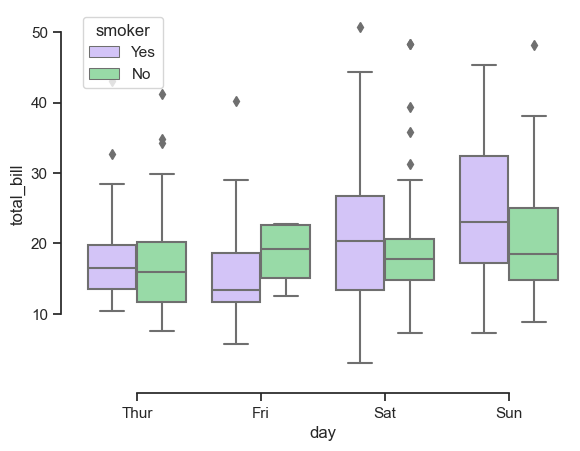

In [5]:
import seaborn as sns
sns.set_theme(style="ticks", palette="pastel")

# Load the example tips dataset
tips = sns.load_dataset("tips")

# Draw a nested boxplot to show bills by day and time
sns.boxplot(x="day", y="total_bill",
            hue="smoker", palette=["m", "g"],
            data=tips)
sns.despine(offset=10, trim=True)

AttributeError: 'Rectangle' object has no property 'errorbar'

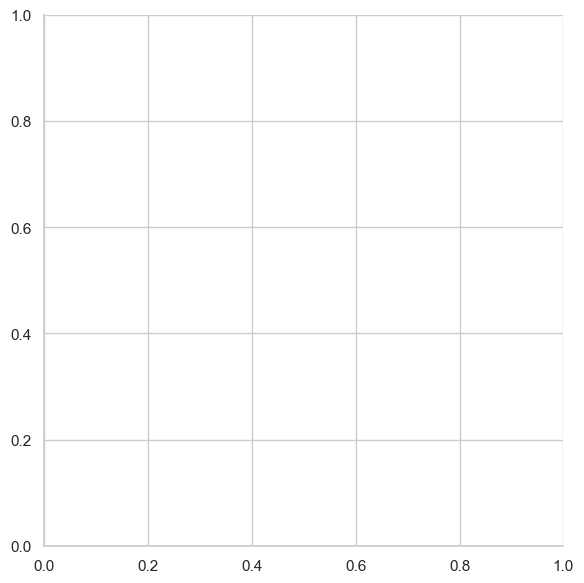

In [6]:
import seaborn as sns
sns.set_theme(style="whitegrid")

penguins = sns.load_dataset("penguins")

# Draw a nested barplot by species and sex
g = sns.catplot(
    data=penguins, kind="bar",
    x="species", y="body_mass_g", hue="sex",
    errorbar="sd", palette="dark", alpha=.6, height=6
)
g.despine(left=True)
g.set_axis_labels("", "Body mass (g)")
g.legend.set_title("")

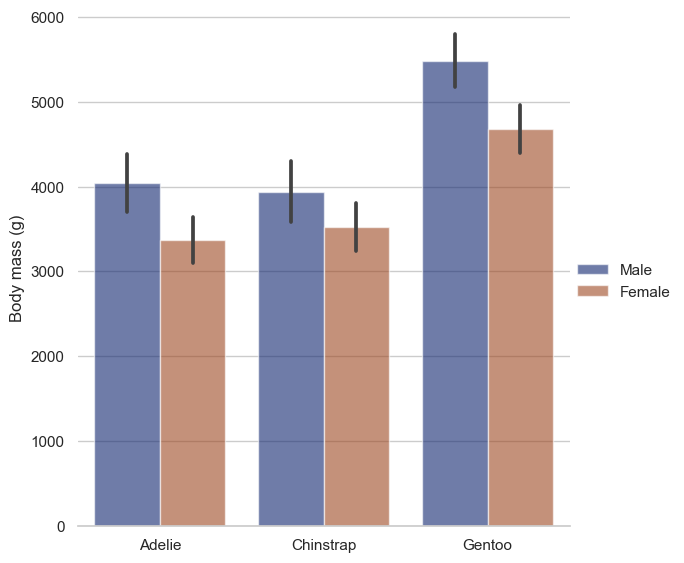

In [1]:
import seaborn as sns
sns.set_theme(style="whitegrid")

penguins = sns.load_dataset("penguins")

# Draw a nested barplot by species and sex
g = sns.catplot(
    data=penguins, kind="bar",
    x="species", y="body_mass_g", hue="sex",
    errorbar="sd", palette="dark", alpha=.6, height=6
)
g.despine(left=True)
g.set_axis_labels("", "Body mass (g)")
g.legend.set_title("")

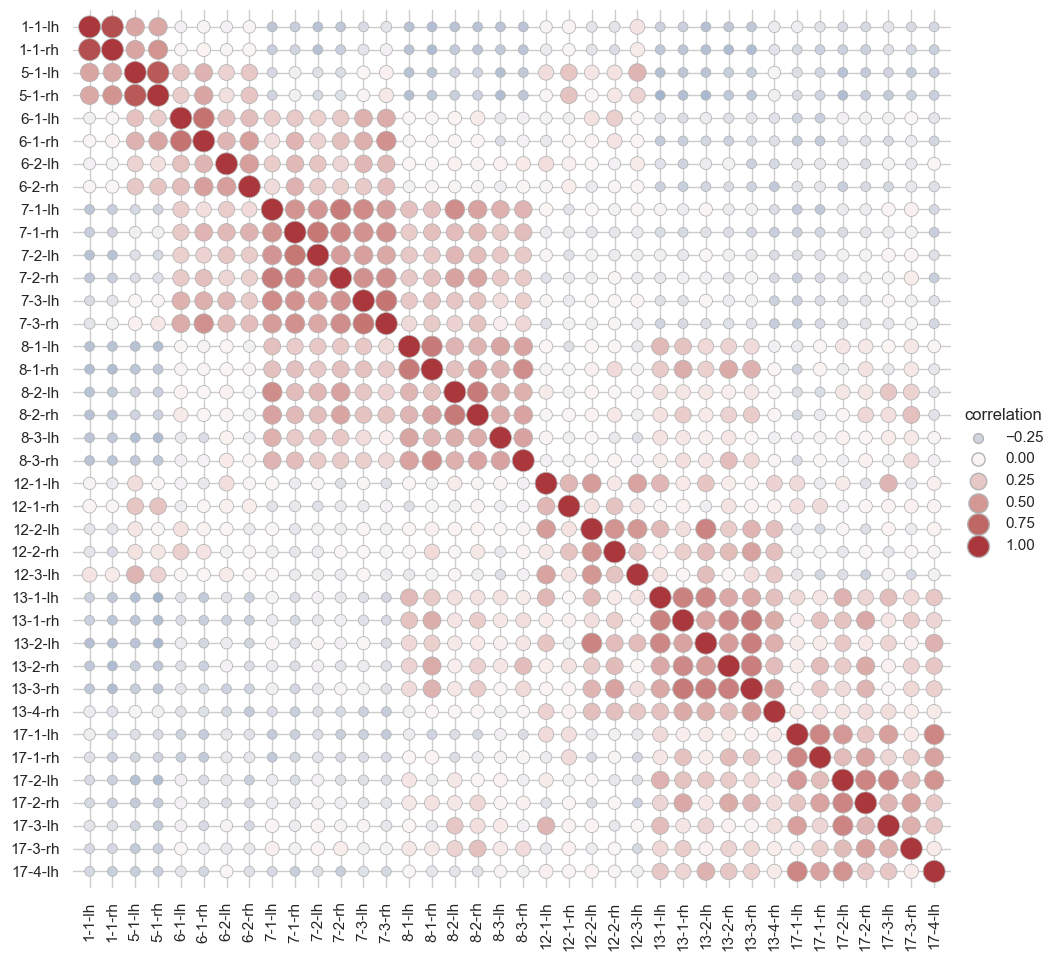

In [2]:
import seaborn as sns
sns.set_theme(style="whitegrid")

# Load the brain networks dataset, select subset, and collapse the multi-index
df = sns.load_dataset("brain_networks", header=[0, 1, 2], index_col=0)

used_networks = [1, 5, 6, 7, 8, 12, 13, 17]
used_columns = (df.columns
                  .get_level_values("network")
                  .astype(int)
                  .isin(used_networks))
df = df.loc[:, used_columns]

df.columns = df.columns.map("-".join)

# Compute a correlation matrix and convert to long-form
corr_mat = df.corr().stack().reset_index(name="correlation")

# Draw each cell as a scatter point with varying size and color
g = sns.relplot(
    data=corr_mat,
    x="level_0", y="level_1", hue="correlation", size="correlation",
    palette="vlag", hue_norm=(-1, 1), edgecolor=".7",
    height=10, sizes=(50, 250), size_norm=(-.2, .8),
)

# Tweak the figure to finalize
g.set(xlabel="", ylabel="", aspect="equal")
g.despine(left=True, bottom=True)
g.ax.margins(.02)
for label in g.ax.get_xticklabels():
    label.set_rotation(90)
for artist in g.legend.legendHandles:
    artist.set_edgecolor(".7")

In [1]:
import numpy as np
from sklearn.datasets import load_iris
from sklearn.preprocessing import StandardScaler, KBinsDiscretizer
from sklearn.compose import ColumnTransformer

X, y = load_iris(as_frame=True, return_X_y=True)
sepal_cols = ["sepal length (cm)", "sepal width (cm)"]
petal_cols = ["petal length (cm)", "petal width (cm)"]

preprocessor = ColumnTransformer(
    [
        ("scaler", StandardScaler(), sepal_cols),
        ("kbin", KBinsDiscretizer(encode="ordinal"), petal_cols),
    ],
    verbose_feature_names_out=False,
).set_output(transform="pandas")

X_out = preprocessor.fit_transform(X)
X_out.sample(n=5, random_state=0)

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
114,-0.052506,-0.592373,3.0,4.0
62,0.189830,-1.973554,2.0,1.0
33,-0.416010,2.630382,0.0,1.0
107,1.765012,-0.362176,4.0,3.0
7,-1.021849,0.788808,1.0,1.0


<AxesSubplot: >

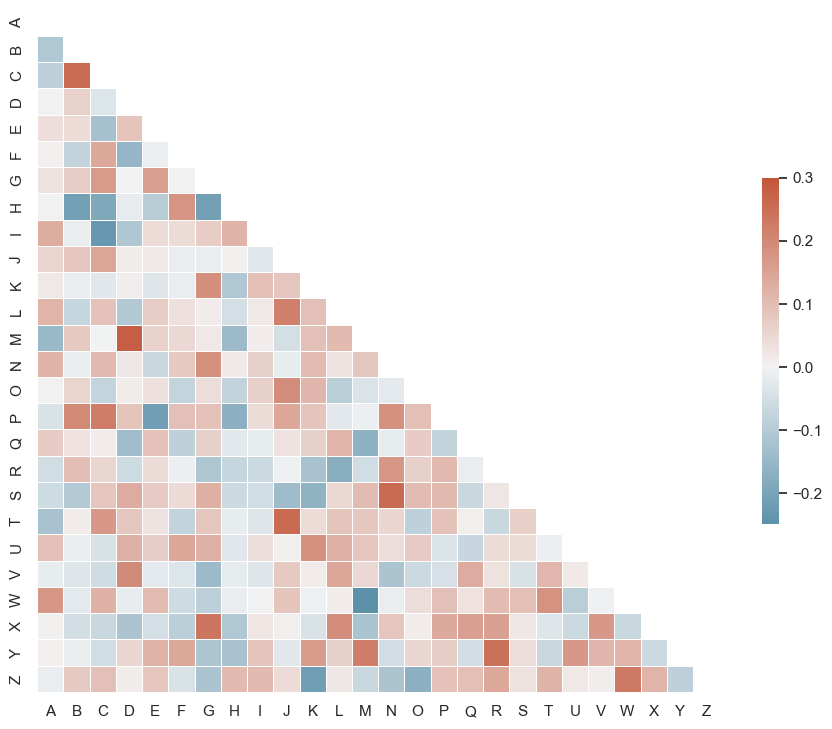

In [1]:
from string import ascii_letters
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

sns.set_theme(style="white")

# Generate a large random dataset
rs = np.random.RandomState(33)
d = pd.DataFrame(data=rs.normal(size=(100, 26)),
                 columns=list(ascii_letters[26:]))

# Compute the correlation matrix
corr = d.corr()

# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=bool))

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(230, 20, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

ValueError: found the following matches with the input file in xarray's IO backends: ['netcdf4', 'h5netcdf']. But their dependencies may not be installed, see:
https://docs.xarray.dev/en/stable/user-guide/io.html 
https://docs.xarray.dev/en/stable/getting-started-guide/installing.html

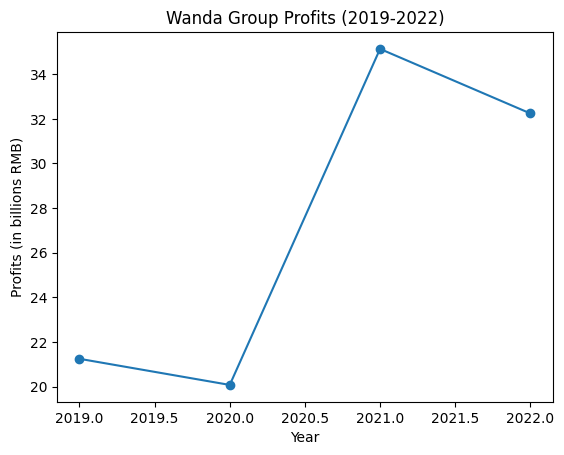

In [1]:
import matplotlib.pyplot as plt

years = [2019, 2020, 2021, 2022]
profits = [21.25, 20.08, 35.13, 32.24]

plt.plot(years, profits, marker='o')
plt.title('Wanda Group Profits (2019-2022)')
plt.xlabel('Year')
plt.ylabel('Profits (in billions RMB)')

plt.show()


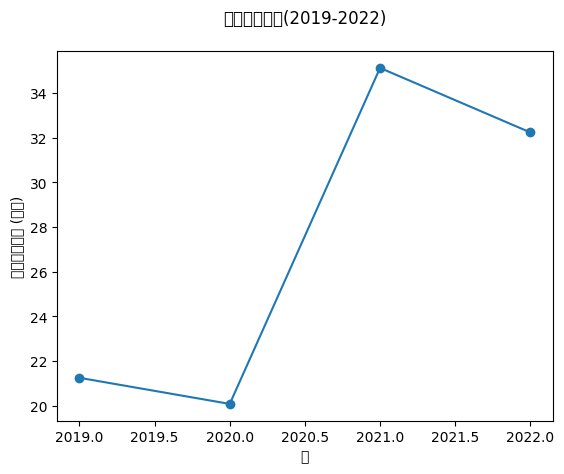

In [5]:
import matplotlib.pyplot as plt

years = [2019, 2020, 2021, 2022]
profits = [21.25, 20.08, 35.13, 32.24]

plt.plot(years, profits, marker='o')
plt.xlabel('年')
plt.ylabel('万达集团利润 (亿元)')

plt.title('万达集团利润(2019-2022)', pad=20)

plt.show()


In [3]:
import matplotlib.pyplot as plt

years = [2019, 2020, 2021, 2022]
profits = [21.25, 20.08, 35.13, 32.24]

plt.plot(years, profits, marker='o')
plt.xlabel('Year')
plt.ylabel('Profits (in billions RMB)')
plt.title('Wanda Group Profits (2019-2022)', pad=20)

plt.subplots_adjust(bottom=0.2) # 调整底部边缘

plt.text(2.5, -5, 'Source: Wanda Group', ha='center') # 添加数据来源说明

plt.show()    

ValueError: Image size of 303656x870 pixels is too large. It must be less than 2^16 in each direction.

<Figure size 640x480 with 1 Axes>

In [22]:
import pandas as pd
csv_path = "E:\gis\毕业论文\梁\\0114--0\sel_china_remapcon_tas_day_BCC_ssp126_2022_3_5_cn05grid_downscaled_nothern_sel.csv"
df = pd.read_csv(csv_path)

In [23]:
print(df.head())

    lat   lon                 time  height        tas
0  30.0  90.0  2022-03-01 12:00:00     2.0 -12.503983
1  30.0  90.0  2022-03-02 12:00:00     2.0 -12.803406
2  30.0  90.0  2022-03-03 12:00:00     2.0  -6.893738
3  30.0  90.0  2022-03-04 12:00:00     2.0  -4.880371
4  30.0  90.0  2022-03-05 12:00:00     2.0   1.424408


In [24]:
df['time'] = pd.to_datetime(df['time'])

In [25]:
start_date = '2022-03-01'
end_date = '2022-05-31'

In [26]:
filtered_df = df[(df['time'] >= start_date) & (df['time'] <= end_date)]

In [27]:
print(filtered_df.head())

    lat   lon                time  height        tas
0  30.0  90.0 2022-03-01 12:00:00     2.0 -12.503983
1  30.0  90.0 2022-03-02 12:00:00     2.0 -12.803406
2  30.0  90.0 2022-03-03 12:00:00     2.0  -6.893738
3  30.0  90.0 2022-03-04 12:00:00     2.0  -4.880371
4  30.0  90.0 2022-03-05 12:00:00     2.0   1.424408


In [28]:
#让每行相同lat,lon但是time不同的数据求hur平均并且重新记录一个csv记录lat,lon和平均值
new_df = filtered_df.groupby(['lat','lon']).mean().reset_index()

print(new_df.head())

    lat    lon  height       tas
0  30.0  90.00     2.0  1.133328
1  30.0  90.25     2.0  1.351517
2  30.0  90.50     2.0  2.342898
3  30.0  90.75     2.0  4.344564
4  30.0  91.00     2.0  5.314629


C:\Users\86151\AppData\Local\Temp\ipykernel_22312\3630090955.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  new_df = filtered_df.groupby(['lat','lon']).mean().reset_index()


In [29]:
new_df.to_csv('E:\gis\毕业论文\梁\\0114--0\sel_china_remapcon_tas_day_BCC_ssp126_2022_3_5_cn05grid_downscaled_nothern_sel_mean.csv', index=False)